# Laboratorio - 

Raul Jimenez - 19017
Donaldo Garcia - 19683

## Complete las tareas indicadas abajo

**TAREA: Ejecute las siguientes importaciones**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Los datos

En la tabla que van a trabajar, se encuentra el consumo promedio de 17 tipos de comida, en gramos por persona por semana, para cada país del Reino Unido (UK).

La tabla tiene algunas variaciones interesantes en diferentes tipos de comida, pero a nivel general las diferencias no son tan notables.

**TAREA:  Ejecute la siguiente instrucción para leer los datos**

Es posible que tenga que modificar la instrucción de acuerdo al lugar donde descargó el archivo.

In [2]:
df = pd.read_csv('./UK_foods.csv', index_col = 'Unnamed: 0')

**TAREA: Despliegue el DataFrame**

In [3]:
#SU CODIGO AQUI
df.head(10)

,England,Wales,Scotland,N.Ireland
Cheese,105,103,103,66
Carcass_meat,245,227,242,267
Other_meat,685,803,750,586
Fish,147,160,122,93
Fats_and_oils,193,235,184,209
Sugars,156,175,147,139
Fresh_potatoes,720,874,566,1033
Fresh_Veg,253,265,171,143
Other_Veg,488,570,418,355
Processed_potatoes,198,203,220,187


In [4]:
df.shape

(17, 4)

**TAREA:  Realice la transposición del DataFrame para que las columnas se conviertan en el índice.**

In [5]:
#SU CODIGO AQUI
df_transpose = df.T

In [6]:
df_transpose.head(10)

,Cheese,Carcass_meat,Other_meat,Fish,Fats_and_oils,Sugars,Fresh_potatoes,Fresh_Veg,Other_Veg,Processed_potatoes,Processed_Veg,Fresh_fruit,Cereals,Beverages,Soft_drinks,Alcoholic_drinks,Confectionery
England,105,245,685,147,193,156,720,253,488,198,360,1102,1472,57,1374,375,54
Wales,103,227,803,160,235,175,874,265,570,203,365,1137,1582,73,1256,475,64
Scotland,103,242,750,122,184,147,566,171,418,220,337,957,1462,53,1572,458,62
N.Ireland,66,267,586,93,209,139,1033,143,355,187,334,674,1494,47,1506,135,41


**TAREA:  Cree un mapa de calor a partir del DataFrame.** 

¿Existe algún país que sobresalga por diferencia de los otros?  Puede ser bastante difícil determinar esto solo por la imagen.

**R/ Analizando el mapa de calor nosotros pensamos que el pais que mas sobre sale es "Whales" debido a que tiene mas puntos claros con respecto a los otros.**

¿Habrá algún par de países que parezcan muy similares entre si?

**R/ Observando el mapa de calor se puede decir que hay dos similares, sin embargo no exactamente iguales, nosotros pensamos que los dos similares son England y whalres debido a que son las que tienen colores mas parecidos.**



<AxesSubplot: >

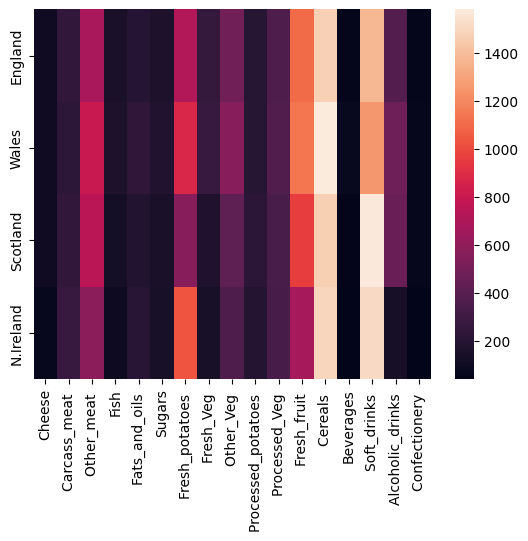

In [7]:
#SU CODIGO AQUI
sns.heatmap(df_transpose)

**TAREA:  Realice las importaciones necesarias para construir un AutoCodificador.  La meta será reducir las dimensiones de 17 --> 2 y ver si hay países que resalten como diferentes.**

In [20]:
#SU CODIGO AQUI
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from sklearn.preprocessing import MinMaxScaler

**TAREA:  Cree un codificador**

In [9]:
#SU CODIGO AQUI
codificador = Sequential()
codificador.add(Dense(units = 2,
                      activation = 'relu',
                      input_shape = [17]))

**TAREA: Cree un decodificador.**

In [10]:
#SU CODIGO AQUI
decodificador = Sequential()
decodificador.add(Dense(units = 17,
                        activation = 'relu',
                        input_shape = [2]))

**TAREA: Combine el codificador y el decodificador para conformar un AutoCodificador, y complile el modelo.**

In [11]:
#SU CODIGO AQUI

In [12]:
autocodificador = Sequential([codificador,
                              decodificador])
autocodificador.compile(loss = "mse",
                        optimizer = SGD(lr = 1.5))

c:\Users\ALIEWARE\Documents\Raul_Angel\UVG_COMPU\8vo_Semestre\Data Science\Laboratorio-6-Data-Science\venv\lib\site-packages\keras\optimizers\optimizer_v2\gradient_descent.py:111: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


**TAREA: Cree un normalizador MinMaxScaler para normalizar (escalar) los datos.  Asegúrese de transponer los datos ya que realmente tenemos 17 columnas (features) y solo 4 filas (uno por país).**

In [22]:
#SU CODIGO AQUI
normalizador = MinMaxScaler()
datos_normalizados = normalizador.fit_transform(df_transpose)

In [23]:
datos_normalizados

array([[1.        , 0.45      , 0.4562212 , 0.80597015, 0.17647059,
        0.47222222, 0.32976445, 0.90163934, 0.61860465, 0.33333333,
        0.83870968, 0.92440605, 0.08333333, 0.38461538, 0.37341772,
        0.70588235, 0.56521739],
       [0.94871795, 0.        , 1.        , 1.        , 1.        ,
        1.        , 0.65952891, 1.        , 1.        , 0.48484848,
        1.        , 1.        , 1.        , 1.        , 0.        ,
        1.        , 1.        ],
       [0.94871795, 0.375     , 0.75576037, 0.43283582, 0.        ,
        0.22222222, 0.        , 0.2295082 , 0.29302326, 1.        ,
        0.09677419, 0.6112311 , 0.        , 0.23076923, 1.        ,
        0.95      , 0.91304348],
       [0.        , 1.        , 0.        , 0.        , 0.49019608,
        0.        , 1.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.26666667, 0.        , 0.79113924,
        0.        , 0.        ]])

In [14]:
# NOTA la forma debe ser 17 columnas por 4 filas.

**TAREA:  Ajuste el AutoCodificador a los datos normalizados por medio de 15 épocas.**

In [24]:
#SU CODIGO AQUI
autocodificador.fit(datos_normalizados,
                    datos_normalizados,
                    epochs = 15)

Epoch 1/15
1/1 [==============================] - 0s 339ms/step - loss: 0.3714
Epoch 2/15
1/1 [==============================] - 0s 4ms/step - loss: 0.3230
Epoch 3/15
1/1 [==============================] - 0s 2ms/step - loss: 0.2955
Epoch 4/15
1/1 [==============================] - 0s 3ms/step - loss: 0.2813
Epoch 5/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2645
Epoch 6/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2565
Epoch 7/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2519
Epoch 8/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2481
Epoch 9/15
1/1 [==============================] - 0s 4ms/step - loss: 0.2432
Epoch 10/15
1/1 [==============================] - 0s 6ms/step - loss: 0.2405
Epoch 11/15
1/1 [==============================] - 0s 5ms/step - loss: 0.2384
Epoch 12/15
1/1 [==============================] - 0s 7ms/step - loss: 0.2366
Epoch 13/15
1/1 [==============================] - 0s 6ms/step - loss: 

**TAREA: Pase los datos normalizados solo por el codificador y prediga la salida ya re-dimensionada.  Nota: Lo más seguro es que obtengan resultados diferentes debido a las inicializaciones al azar.**

In [25]:
#SU CODIGO AQUI
codificado_2dim = codificador.predict(datos_normalizados)

1/1 [==============================] - 0s 82ms/step


In [26]:
codificado_2dim.shape

(4, 2)

In [27]:
codificado_2dim

array([[1.4858309 , 0.23793021],
       [2.8680892 , 0.        ],
       [0.3286628 , 0.95019203],
       [0.3008058 , 0.        ]], dtype=float32)

**TAREA:  Una los datos codificados bidimensionales, con el indice original de países.  Asegúrese de verificar el orden del índice para asegurar que quede unido correctamente.  Hay muchas formas de hacer esto con Pandas.**

In [17]:
#SU CODIGO AQUI

In [1]:
index = df.transpose().index

NameError: name 'df' is not defined

In [ ]:
new_df = pd.DataFrame(data=codificado_2dim, index= index)

In [ ]:
new_df.reset_index(inplace=True)
new_df

**TAREA:  Ahora grafique estos resultados con una gráfica de dispersión, etiquedados por su país respectivo.**

¿Se nota ya algún país que difiera de los otros?  ¿Cuál?

In [18]:
#SU CODIGO AQUI

In [ ]:
sns.scatterplot(x=0,y=1,data=new_df, hue="index")

Al regresar a ver los datos en la tabla, esto tiene sentido: los Nor-Irlandeses comen mucho más gramos de papas frescas y mucho menos de frutas frescas, queso, pescado y bebidad alcohólicas.

Es buena seña que la estructura que se visualiza refleje un hecho grande de la geografía real:  Irlanda del Norte es el único de los cuatro países que no están en la isla de Gran Bretaña. (Si tiene confusión entre Inglaterra, el Reino Unido y Gran Bretaña, vea: este [video](https://www.youtube.com/watch?v=rNu8XDBSn10).)